mkdir coco  
cd coco  
mkdir images  
cd images  

!wget http://images.cocodataset.org/zips/train2017.zip  
unzip train2017.zip  
rm train2017.zip  

Reference : https://gist.github.com/mkocabas/a6177fc00315403d31572e17700d7fd9  

In [1]:
import cv2
import matplotlib.pyplot as plt
import json
import sys

In [2]:
img_path='/home/lab/cocodataset/train2017/train2017/000000' # your directory
jpg='.jpg'
json_path= '/home/lab/cocodataset/annotations/annotations/person_keypoints_train2017.json' # your directory

In [3]:
with open(json_path) as json_file:
    json_data=json.load(json_file)

In [4]:
def make_keypoint(keypoint,bbox,k_name):
    list_kp=[]
    if int(len(keypoint)/3) != len(keypoint)/3:
        print("NO Matching")
        sys.exit()
        
    for i in range(int(len(keypoint)/3)):
        coordinate=[]
        x=keypoint[i*3]
        y=keypoint[i*3+1]
        v=keypoint[i*3+2]
        coordinate.append(x)
        coordinate.append(y)
        coordinate.append(v)
        list_kp.append(coordinate)
    i_x=int(bbox[0])
    i_y=int(bbox[1])
    i_w=int(bbox[2])
    i_h=int(bbox[3])
    new_list=[]
    for n,i in enumerate(list_kp):
        if i[2]==0:
            print("No coordinate :",k_name[n])
        elif i[2]==1: 
            print("Yes coordinate(Invisible) : ",k_name[n])
            i[0]=i[0]-i_x
            i[1]=i[1]-i_y
            new_list.append(i)
        elif i[2]==2:
            print("Yes coordinate : ",k_name[n])
            i[0]=i[0]-i_x
            i[1]=i[1]-i_y
            new_list.append(i)
    return new_list

In [5]:
def COCO_Visualization(json_data,index):
    N_KP=json_data['annotations'][index]['num_keypoints']
    img=json_data['annotations'][index]['image_id']
    keypoint=json_data['annotations'][index]['keypoints']
    crowd=json_data['annotations'][index]['iscrowd']
    bbox=json_data['annotations'][index]['bbox']
    k_name=json_data['categories'][0]['keypoints']
    img=str(img)
    while len(img)<6:
        img='0'+img
    print(img)
    print(type(N_KP))
    list_kp=make_keypoint(keypoint,bbox,k_name)
    img=cv2.imread(img_path+img+jpg)
    i_x=int(bbox[0])
    i_y=int(bbox[1])
    i_w=int(bbox[2])
    i_h=int(bbox[3])
    b_img=img[i_y : i_y+i_h , i_x : i_x+i_w]
    plt.imshow(b_img)
    for i in list_kp:
        plt.scatter(i[0],i[1])
    print('is_crowd? : ',crowd)
    print('Num_keypoint : ', N_KP)

065661
<class 'int'>
Yes coordinate(Invisible) :  nose
Yes coordinate :  left_eye
No coordinate : right_eye
Yes coordinate :  left_ear
No coordinate : right_ear
Yes coordinate :  left_shoulder
Yes coordinate :  right_shoulder
No coordinate : left_elbow
No coordinate : right_elbow
No coordinate : left_wrist
No coordinate : right_wrist
Yes coordinate(Invisible) :  left_hip
Yes coordinate :  right_hip
Yes coordinate(Invisible) :  left_knee
Yes coordinate :  right_knee
Yes coordinate(Invisible) :  left_ankle
Yes coordinate :  right_ankle
is_crowd? :  0
Num_keypoint :  11


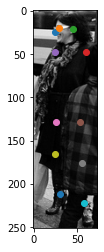

In [6]:
COCO_Visualization(json_data,2000)